In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import mode
from sklearn.cluster import KMeans

## Exercise 1. Training data

## a) Plot the training data.

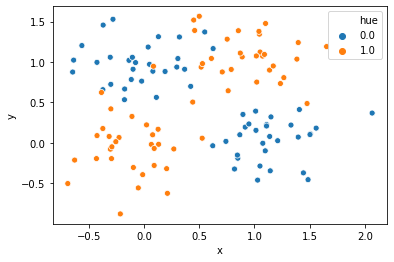

In [2]:
mu_1 = np.array([0,1]).T
mu_2 = np.array([1,0]).T
mu_3 = np.array([0,0]).T
mu_4 = np.array([1,1]).T
var = 0.1
num = 60

n_1=np.random.multivariate_normal(mu_1,np.identity(2)*var,num)
n_2=np.random.multivariate_normal(mu_2,np.identity(2)*var,num)
n_3=np.random.multivariate_normal(mu_3,np.identity(2)*var,num)
n_4=np.random.multivariate_normal(mu_4,np.identity(2)*var,num)

train_data = np.zeros((num*2,2))
label_vectorized = np.zeros((num*2,2)) # dimensions because of binary classification
labels_plot = np.zeros(num*2)

# you could also use np.random.choice([0,1],size=p)

for i in range(0,num):
    label_vectorized[i+num,1]=1
    label_vectorized[i,0]=1
    labels_plot[i+num]=1
    if i%2==0:
        train_data[i,:] = n_1[i,:]
        train_data[i+num,:] = n_3[i,:]
    else:
        train_data[i,:] = n_2[i,:]
        train_data[i+num,:] = n_4[i,:]

x = train_data[:,0]
y = train_data[:,1]

train_set = {'x': x,'y': y,'hue': labels_plot}
train_set = pd.DataFrame(train_set, columns = ['x', 'y','hue'])

sn.scatterplot(data=train_set,x='x',y='y',hue='hue');

## Exercise 2. k nearest neighbors (kNN)

In [3]:
def k_nn(k,train_data,num_points,labels_train):
    
    x=np.linspace(-1,2,num_points)
    y=np.linspace(-1,2,num_points)
    xx, yy= np.array(np.meshgrid(x,y))

    points_grid=np.c_[xx.ravel(),yy.ravel()]
    labels = np.zeros(len(points_grid))

    for j in range(0,len(points_grid)):
       
        new_label = np.zeros(labels_train.shape[1])
        distances = np.sum(np.abs(points_grid[j,:]-train_data),axis=1)
        order = np.argsort(distances)

        for i in range (0,k):
            new_label += labels_train[order[i]]
          
        labels[j] = np.argmax(new_label)
        
    return points_grid,labels

## a) Plot the training patterns and the decision boundary.

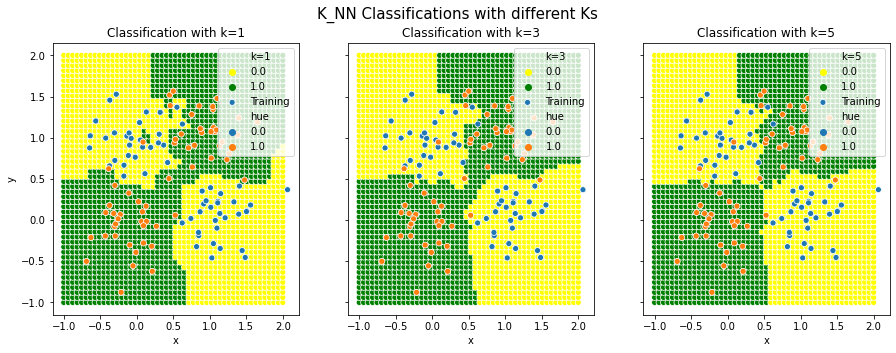

In [4]:
k= np.array([1,3,5])
num_points = 50

labels = np.zeros((num_points**2,len(k)))

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('K_NN Classifications with different K''s',fontsize=15)

for i in range(0,len(k)):
    points_grid,labels[:,i] = k_nn(k[i],train_data,num_points,label_vectorized)
    
    if i==0: 
        x = points_grid[:,0]
        y = points_grid[:,1]
        k_nn_add={'x': x,'y': y}
        k_nn_grid = pd.DataFrame(k_nn_add, columns = ['x', 'y'])
        
    k_nn_grid['k='+str(k[i])] = labels[:,i]
    
    sn.scatterplot(ax=axes[i],data=k_nn_grid,x='x',y='y',hue='k='+str(k[i]),palette=['yellow','green'])
    sn.scatterplot(ax=axes[i],data=train_set,x='x',y='y',hue='hue',label='Training');
    axes[i].set_title('Classification with k=' +str(k[i]))
    

### What do you observe?

It can be seen that using a higher number of neighbors creates a more defined clustering and, in this case, a more accurate classification. Overfitting can be seen with k=1.

## Exercise 3. "Parzen window" classifier

In [5]:
def kernel(data_1,data_2,var,ax):
    return np.exp(-np.sum(np.abs(data_1-data_2),axis=ax)**2/(2*var))
       
def parzen(var,train,num_points,labels_train,ax):
    x=np.linspace(-1,2,num_points)
    y=np.linspace(-1,2,num_points)
    xx, yy= np.array(np.meshgrid(x,y))

    points_grid=np.c_[xx.ravel(),yy.ravel()]
    labels = np.zeros(len(points_grid))

    for j in range(0,len(points_grid)):
        kern =  kernel(points_grid[j,:],train,var,ax)
        label_grid=np.matmul(kern,labels_train)/np.sum(kern)
        
        labels[j] = np.argmax(label_grid)
        
    return points_grid,labels

## a) Plot the training patterns and the decision boundary.

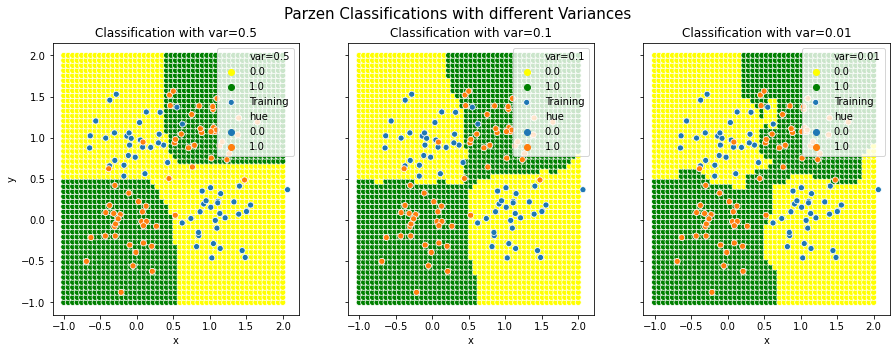

In [6]:
var= np.array([0.5,0.1,0.01])
num_points = 50

labels = np.zeros((num_points**2,len(k)))

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Parzen Classifications with different Variances',fontsize=15)

colors = ['black','white']

for i in range(0,len(var)):
    points_grid,labels[:,i] = parzen(var[i],train_data,num_points,label_vectorized,ax=1)
    
    if i==0: 
        x = points_grid[:,0]
        y = points_grid[:,1]
        parzen_add={'x': x,'y': y}
        parzen_grid = pd.DataFrame(parzen_add, columns = ['x', 'y'])
        
    parzen_grid['var='+str(var[i])] = labels[:,i]

    sn.scatterplot(ax=axes[i],data=parzen_grid,x='x',y='y',hue='var='+str(var[i]),palette=['yellow','green'])
    sn.scatterplot(ax=axes[i],data=train_set,x='x',y='y',hue='hue',label='Training');
    axes[i].set_title('Classification with var=' +str(var[i]))

## b) Add a third class and compare kNN and Parzen-window classification on the data.

(Text(0.5, 1.0, 'New distribution of the training data with 3 classes'),)

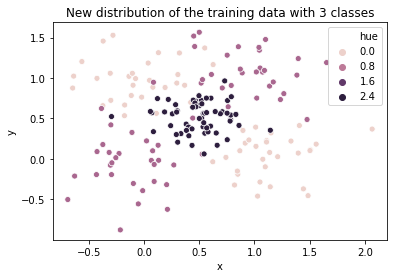

In [7]:
# Adding the third class and visualizing it

var = 0.05
num = 60

mu_5=np.array([0.5,0.5]).T

n_5=np.random.multivariate_normal(mu_5,np.identity(2)*var,num)

new_label_vectorized = np.zeros((num*3,3)) # dimensions because of three-classes classification
new_labels_plot = np.zeros(num*3)

new_train_data=train_data
new_train_data=np.vstack((new_train_data,np.zeros((num,2))))

for i in range(0,num):
    new_label_vectorized[i+num,1]=1
    new_label_vectorized[i,0]=1
    new_label_vectorized[i+2*num,2]=1
    
    new_labels_plot[i+num]=1
    new_labels_plot[i+2*num]=2
    
    new_train_data[i+2*num,:] = n_5[i,:]

x = new_train_data[:,0]
y = new_train_data[:,1]

new_train_set = {'x': x,'y': y,'hue': new_labels_plot}
new_train_set = pd.DataFrame(new_train_set, columns = ['x', 'y','hue'])

sn.scatterplot(data=new_train_set,x='x',y='y',hue='hue');
plt.title('New distribution of the training data with 3 classes'),

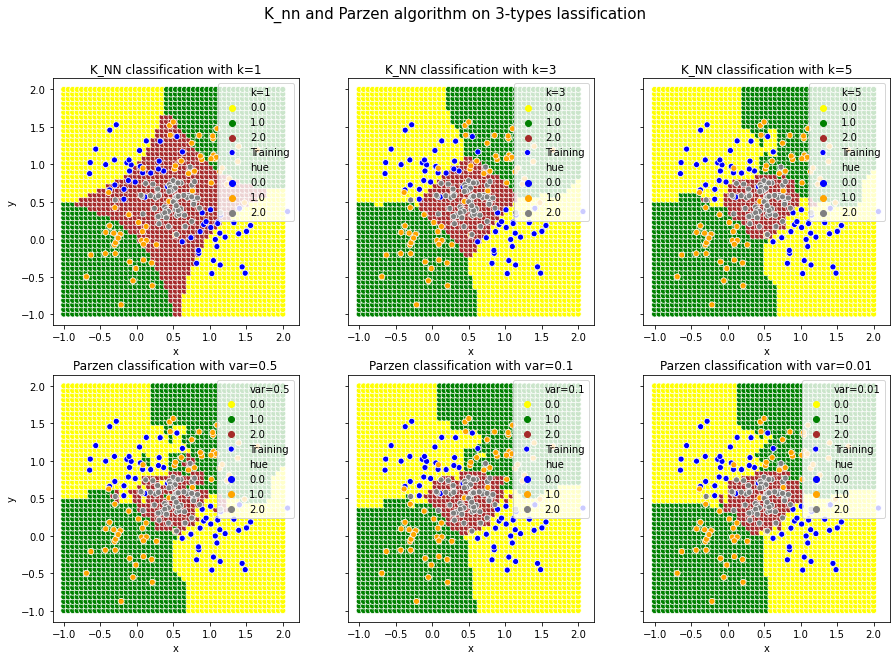

In [8]:
var= np.array([0.5,0.1,0.01])
k = np.array([1,3,5])
num_points = 50

labels_k_nn = np.zeros((num_points**2,len(k)))
labels_parzen = np.zeros((num_points**2,len(k)))

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
fig.suptitle('K_nn and Parzen algorithm on 3-types lassification ',fontsize=15)

for i in range(0,len(var)):
    points_grid,labels_k_nn[:,i] = parzen(var[i],new_train_data,num_points,new_label_vectorized,ax=1)
    points_grid,labels_parzen[:,i] = k_nn(k[i],new_train_data,num_points,new_label_vectorized)
    
    if i==0: 
        x = points_grid[:,0]
        y = points_grid[:,1]
        k_nn_add={'x': x,'y': y}
        k_nn_new_grid = pd.DataFrame(k_nn_add, columns = ['x', 'y'])
        parzen_new_grid = pd.DataFrame(k_nn_add, columns = ['x', 'y'])
    
    parzen_new_grid['var='+str(var[i])] = labels_parzen[:,i]
    k_nn_new_grid['k='+str(k[i])] = labels_k_nn[:,i]
    
    sn.scatterplot(ax= axes[0][i],data=k_nn_new_grid,x='x',y='y',hue='k='+str(k[i]),palette=['yellow','green','brown'])
    sn.scatterplot(ax=axes[0][i],data=new_train_set,x='x',y='y',hue='hue',label='Training',palette=['blue','orange','gray']);
    axes[0][i].set_title('K_NN classification with k=' +str(k[i]))
    
    sn.scatterplot(ax= axes[1][i],data=parzen_new_grid,x='x',y='y',hue='var='+str(var[i]),palette=['yellow','green','brown'])
    sn.scatterplot(ax=axes[1][i],data=new_train_set,x='x',y='y',hue='hue',label='Training',palette=['blue','orange','gray']);
    axes[1][i].set_title('Parzen classification with var=' +str(var[i]))

## Exercise 4. RBF networks.

In [9]:
def phi(K,data_to_phi,var,centers):
    
    phi_res=np.ones((K+1,len(data_to_phi)))

    for i in range(1,K+1):
    
        for j in range(0,len(data_to_phi)):
        
            phi_res[i,j] =  kernel(data_to_phi[j,:],centers[i-1,:],var,ax=0)
            
    return phi_res

def rbf(K,var,data_to_label,train_data,centers,labels_train):
    x=np.linspace(-1,2,num_points)
    y=np.linspace(-1,2,num_points)
    xx, yy= np.array(np.meshgrid(x,y))

    points_grid=np.c_[xx.ravel(),yy.ravel()]
    labels = np.zeros(len(data_to_label))

    phi_grid =  phi(K,data_to_label,var,centers)
    phi_train = phi(K,train_data,var,centers)
    weights = np.linalg.inv(phi_train.dot(phi_train.T)).dot(phi_train).dot(labels_train)
    labels_grid=((weights.dot(phi_grid))>=0.5)*1
    
    return labels_grid,phi_grid


### a) Plot the decision boundaries and locations of the representatives.

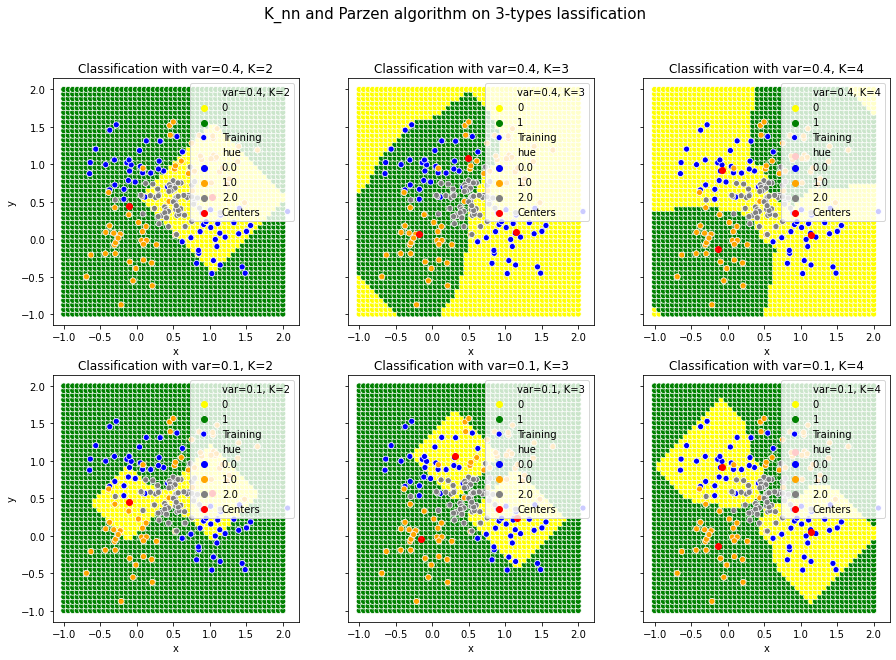

In [10]:
K= [2,3,4]
var = [0.4,0.1]
num_points = 50

x=np.linspace(-1,2,num_points)
y=np.linspace(-1,2,num_points)
xx, yy= np.array(np.meshgrid(x,y))
points_grid=np.c_[xx.ravel(),yy.ravel()]

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
fig.suptitle('K_nn and Parzen algorithm on 3-types lassification ',fontsize=15)

for j in range(0,len(K)):
    for i in range(0,len(var)):
    
        kmeans = KMeans(n_clusters=K[j])
        kmeans.fit(train_data)
        centers = kmeans.cluster_centers_
        
        labels_rbf,phi_r=rbf(K[j],var[i],points_grid,train_data,centers,labels_plot)
        
        if i==0 and j==0:
            x = points_grid[:,0]
            y = points_grid[:,1]
            rbf_add={'x': x,'y': y}
            rbf_grid_a = pd.DataFrame(rbf_add, columns = ['x', 'y'])
     
        rbf_grid_a['var='+str(var[i]) + ', K=' +str(K[j])] = labels_rbf
        
     
        sn.scatterplot(ax= axes[i][j],data=rbf_grid_a,x='x',y='y',hue='var='+str(var[i]) + ', K=' +str(K[j]),palette=['yellow','green'])
        sn.scatterplot(ax=axes[i][j],data=new_train_set,x='x',y='y',hue='hue',label='Training',palette=['blue','orange','gray']);
        axes[i][j].scatter(centers[:,0],centers[:,1],label='Centers',color='red')
        axes[i][j].set_title('Classification with var='+str(var[i]) + ', K=' +str(K[j]))
        
        axes[i][j].legend()

### b) How data appears in the transformed feature space

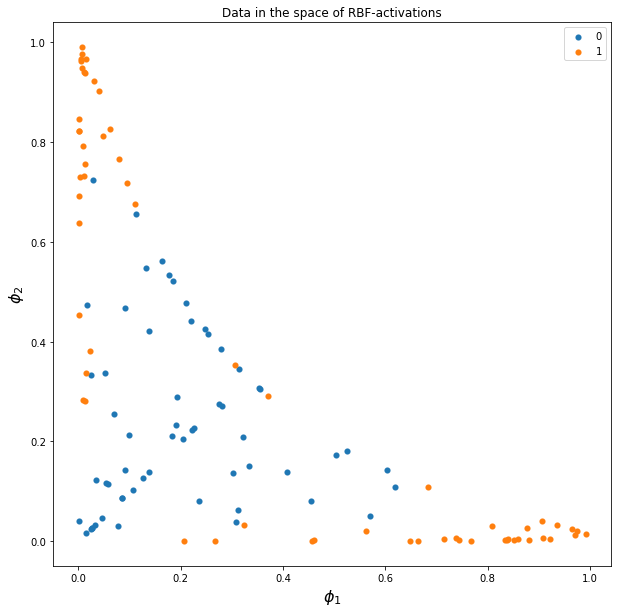

In [11]:
K= 2
var = 0.45

centers = np.array([[0,0],[1,1]])

labels_rbf,phi_r=rbf(K,var,train_data,train_data,centers,labels_plot)

x = train_data[:,0]
y = train_data[:,1]
rbf_add={'x': x,'y': y}
rbf_grid_b = pd.DataFrame(rbf_add, columns = ['x', 'y'])

rbf_grid_b['var='+str(var) + ', K=' +str(K)] = labels_rbf

fig = plt.figure(figsize=(10,10))
plt.scatter(phi_r[1,0:59],phi_r[2,0:59],label='0',linewidth=0.1)
plt.scatter(phi_r[1,60::],phi_r[2,60::],label='1',linewidth=0.1)
plt.xlabel(r'$\phi_{1}$',fontsize=16)
plt.ylabel(r'$\phi_{2}$',fontsize=16)
plt.title('Data in the space of RBF-activations')
plt.legend()

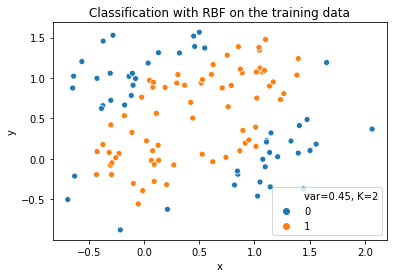

In [12]:
sn.scatterplot(data=rbf_grid_b,x='x',y='y',hue='var='+str(var) + ', K=' +str(K))
plt.title('Classification with RBF on the training data');